In [1]:
# Import packages for later use
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Modules for Random Forests:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Additional imported modules:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

numerical_features = train_data.dtypes[train_data.dtypes != 'object'].index.values
categorical_features = train_data.dtypes[train_data.dtypes == 'object'].index.values
omit = ['SalePrice', 'Id', 'Training']
submit = ['SalePrice', 'Id']

In [3]:
# preprocess

# drop one row in training
train_data.dropna(subset=['Electrical'], inplace=True)

# concat
train_data['Training'] = 1
test_data['Training'] = 0
all_data = pd.concat([train_data, test_data], ignore_index=True)

# fill categoricals
categoricals = all_data[categorical_features]
categoricals.fillna(0, inplace=True)
all_data[categorical_features] = categoricals

# fill numericals with 0
all_data.fillna(0, inplace=True)

# process categoricals
all_data = pd.get_dummies(data=all_data)

train_set = all_data.loc[all_data['Training'] == 1]
test_set = all_data.loc[all_data['Training'] == 0]


In [4]:
# obtain X & y
y = train_set['SalePrice']
y_log = np.log(y)

X = train_set[[c for c in train_set.columns if c not in omit]]
X_test = test_set[[c for c in test_set.columns if c not in omit]]

In [5]:
train_set

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,0,1,0,0,0,0,1,0
1456,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,0,1,0,0,0,0,1,0
1457,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
rt = DecisionTreeRegressor(criterion='mse', max_depth=5)

model_r = rt.fit(X, y_log)

In [7]:
y_log_pred = np.exp(rt.predict(X_test))

# test_data['SalePrice'] = y_log_pred
# submission = test_data[[c for c in test_data.columns if c in submit]]
# submission.to_csv('./data/teamJarvis_rt_2.csv', index=False)

[Text(167.4, 199.32, 'X[3] <= 6.5\nmse = 0.16\nsamples = 1459\nvalue = 12.024'),
 Text(83.7, 163.07999999999998, 'X[15] <= 1378.5\nmse = 0.082\nsamples = 911\nvalue = 11.814'),
 Text(41.85, 126.83999999999999, 'X[11] <= 799.5\nmse = 0.07\nsamples = 564\nvalue = 11.704'),
 Text(20.925, 90.6, 'X[229] <= 0.5\nmse = 0.085\nsamples = 184\nvalue = 11.51'),
 Text(10.4625, 54.359999999999985, 'X[37] <= 0.5\nmse = 0.11\nsamples = 45\nvalue = 11.245'),
 Text(5.23125, 18.119999999999976, 'mse = 0.075\nsamples = 41\nvalue = 11.307'),
 Text(15.693750000000001, 18.119999999999976, 'mse = 0.036\nsamples = 4\nvalue = 10.615'),
 Text(31.387500000000003, 54.359999999999985, 'X[15] <= 1134.5\nmse = 0.047\nsamples = 139\nvalue = 11.596'),
 Text(26.15625, 18.119999999999976, 'mse = 0.043\nsamples = 77\nvalue = 11.503'),
 Text(36.61875, 18.119999999999976, 'mse = 0.028\nsamples = 62\nvalue = 11.711'),
 Text(62.775000000000006, 90.6, 'X[5] <= 1947.5\nmse = 0.035\nsamples = 380\nvalue = 11.798'),
 Text(52.312

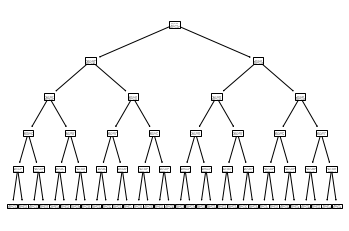

In [8]:
tree.plot_tree(rt)

In [9]:
# Random Forests:
rf = RandomForestRegressor(n_estimators=570, random_state=42, n_jobs=-1, oob_score=True, min_samples_leaf=1,
                           max_features=0.5)

rf.fit(X, y_log)

RandomForestRegressor(max_features=0.5, n_estimators=570, n_jobs=-1,
                      oob_score=True, random_state=42)

In [10]:
y_log_pred = np.exp(rf.predict(X_test))

test_data['SalePrice'] = y_log_pred
submission = test_data[[c for c in test_data.columns if c in submit]]
submission.to_csv('./data/teamJarvis_random_forests.csv', index=False)

In [11]:
# Seeing the importance of features:

importance = pd.DataFrame(rf.feature_importances_,index=X.columns,columns=["Importance"])
importance.sort_values(by=['Importance'],ascending=False)

,Importance
OverallQual,0.320227
GrLivArea,0.166396
YearBuilt,0.076184
TotalBsmtSF,0.042308
GarageCars,0.041309
...,...
Exterior1st_0,0.000000
MSZoning_0,0.000000
KitchenQual_0,0.000000
Exterior2nd_0,0.000000


In [12]:
# # Discarding features with less importance:
# important = importance[importance['Importance'] > 0.01].index

# print(important)
# X = X[important].copy()
# X_test = X_test[important].copy()

In [13]:
# rf.fit(X, y_log)
# y_log_pred = np.exp(rf.predict(X_test))

# test_data['SalePrice'] = y_log_pred
# submission = test_data[[c for c in test_data.columns if c in submit]]
# submission.to_csv('./data/teamJarvis_random_forests_imp.csv', index=False)

In [14]:
# Gradient Boosting Regressor:
gb = GradientBoostingRegressor(n_estimators=570, random_state=42, min_samples_leaf=1, max_features=0.5)

gb.fit(X, y_log)

GradientBoostingRegressor(max_features=0.5, n_estimators=570, random_state=42)

In [15]:
y_log_pred = np.exp(gb.predict(X_test))

test_data['SalePrice'] = y_log_pred
submission = test_data[[c for c in test_data.columns if c in submit]]
submission.to_csv('./data/teamJarvis_gb.csv', index=False)